## End-to-end Multi-class Dog Breed Classification
This notebook builds an end-to-end multi-class imgage classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

## 2. Data
We use kaggle competition dataset

## 3. Evaluation
The evaluation is a file with predictions probabilities for each dog breed of each test image.

## 4. Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10000+ images in the training set (these imgages have labels)
* There are around 10000+ image in the test set (these images don't have labels)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub

In [2]:
labels_csv = pd.read_csv('labels.csv')
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

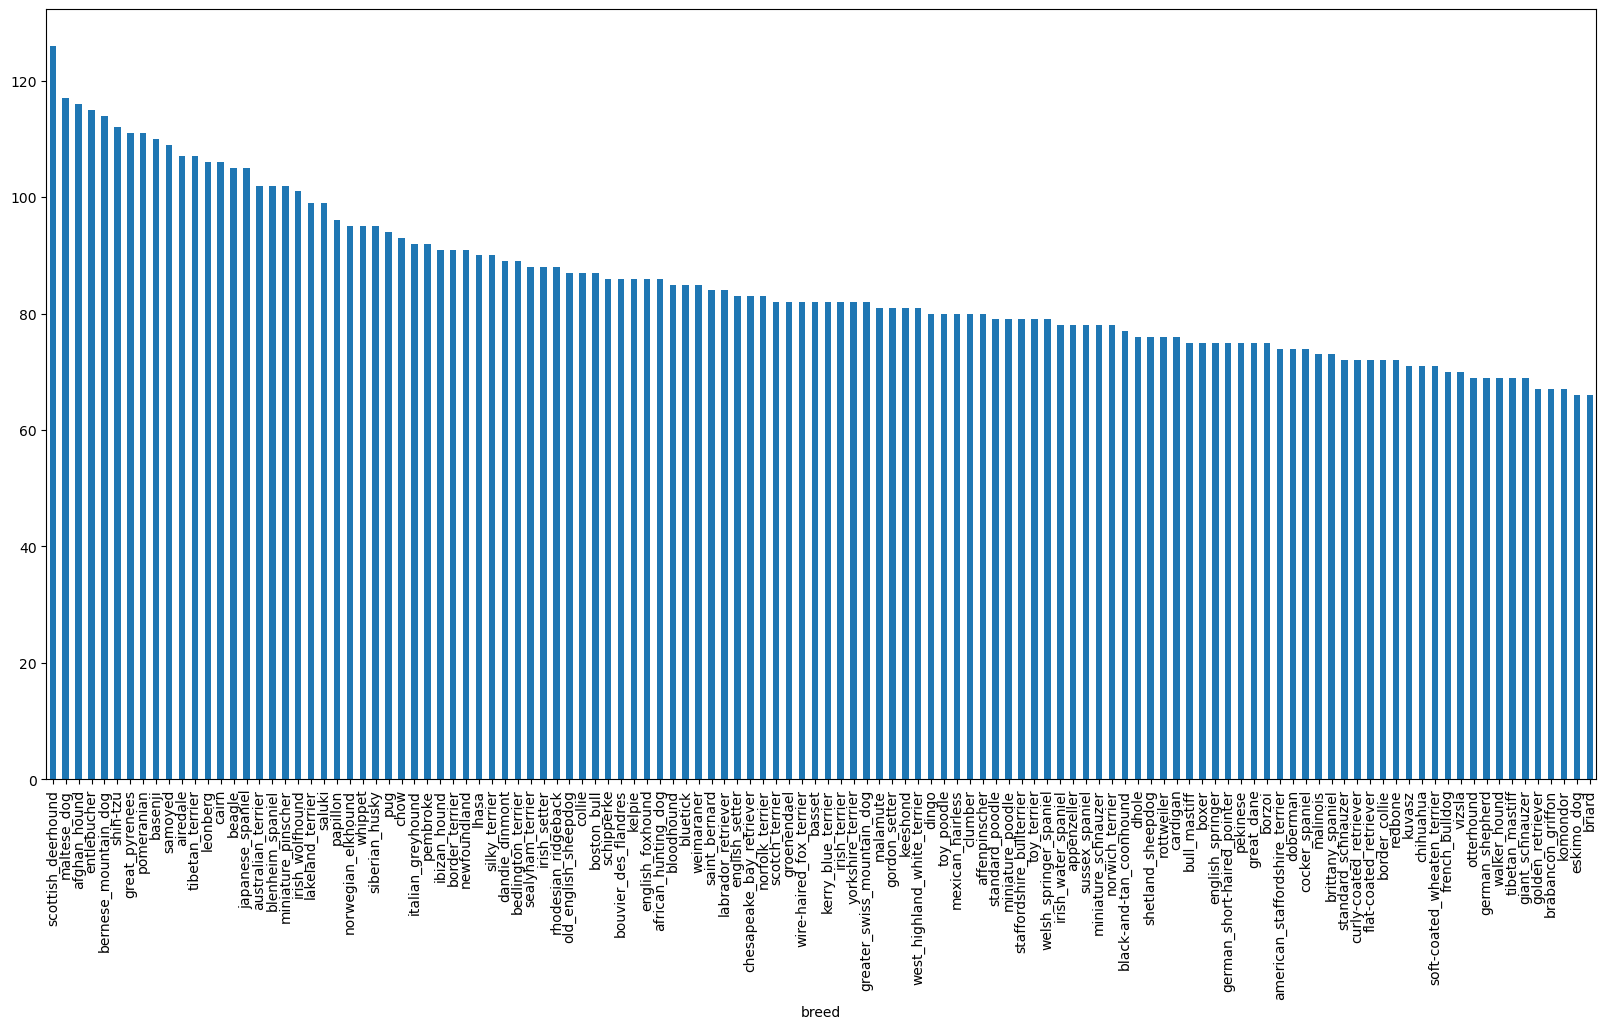

In [4]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [5]:
labels_csv['breed'].value_counts().median()

82.0

In [6]:
from IPython.display import Image

In [7]:
filenames = ['train/' + fname +'.jpg' for fname in labels_csv['id']]

In [8]:
# Check whether number of filenames matches the number of actual files
import os
if len(os.listdir('train/')) == len(filenames):
    print('filenames match actual amount of files')
else:
    print('filenames do not match the actual amount')

filenames match actual amount of files


## Getting our data ready - turning into tensors(numerical representations)


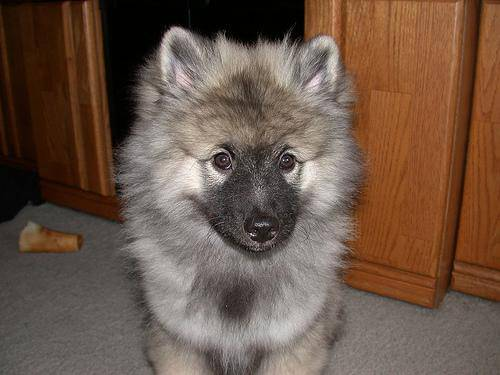

In [9]:
Image(filenames[9130])

In [10]:
labels_csv['breed'][9130]

'keeshond'

In [11]:
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
if len(labels) == len(filenames):
    print('Number of labels matches number of filenames')
else:
    print('Numver of labels doesn\'t match number of filenames')

Number of labels matches number of filenames


In [13]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
# Turn a single array into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
len(boolean_labels)

10222

In [17]:
# Example: turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set

In [19]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [20]:
len(filenames)

10222

We are going to start off experimenting with ~1000 images and increase as needed.

In [21]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
X_train[:2], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## Preprocessing images (turning into Tensors)

In [25]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [27]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
    '''
    Takes an image file path and turns the image into Tensor.
    '''
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 color channels.
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to out desired value (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

### Yann LeCun and Howard John(?)

## Turning our data into batches

why turn ourt data into batches?

In order to use TensorFlow effectively we need our dat in teh form of Tensor tuples which look like this: (image, label)

In [28]:
def get_image_label(image_path, label):
    '''
    Takes an image file path name and the assosciated label, processes
    the image and returns a tuple of (image, label).
    '''
    image = process_image(image_path)
    return image, label

In [29]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [30]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    '''
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    '''
    # if the data is a test dataset - we probably don't have labels
    if test_data:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # if data is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print('Creating training data batches...')
        #Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than
        data = data.shuffle(buffer_size=len(X))
        # Create image label tuples (this also turns the image path into a processed image)
        data = data.map(get_image_label)

        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [31]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [32]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [33]:
def show_25_images(images, labels):
    '''
    Displays a plot of 25 images and their labels from a data batch
    '''
    # Setup a figure
    plt.figure(figsize=(10,10))

    for i in range(25):
        ax = plt.subplot(5,5, i+1)

        plt.imshow(images[i])

        plt.title(unique_breeds[labels[i].argmax()])
        #Turn the grid lines off
        # plt.axis('off')
        

In [34]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [35]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

## Building a model
Before we build a model, there are few things we need to define:
* The input shape of our model
* The output shape of our model
* The URL model we want to use.

In [42]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL ='https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1'


## KERAS sequantional and functional API

In [45]:
# Create a function that builds a Keras model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define input and output shapes
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  # batch, height, width, colour channels
OUTPUT_SHAPE = len(unique_breeds)

# Create a function that builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    # Load the MobileNetV2 model, excluding its top layer (as we'll add our own)
    base_model = MobileNetV2(input_shape=input_shape[1:], include_top=False, pooling='avg')
    base_model.trainable = False  # Freeze the base model

    # Create a new model on top
    model = Sequential([
        base_model,
        Dense(output_shape, activation='softmax')  # Add our custom output layer
    ])

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# Create and view the summary of the model
model = create_model()
model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


## Creating Callbacks
Callbacks are helper functions our model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving 

## TensorBoard Callback

In [46]:
# Load TensorBoard notebook extension
%load_ext tensorboard


In [47]:
import datetime

def create_tensorboard_callback():
    # Create a log directrory for stroing TensorBoard logs
    logdir = os.path.join('logs/',
                          datetime.datetime.now().strftime('%Y%m%%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model

Our first model will be trained only on 1000 images to make sure that everything is working.

In [49]:
NUM_EPOCHS = 1000

In [50]:
# Check if we work on GPU
print('GPU', 'available!' if tf.config.list_physical_devices('GPU') else 'not available')

GPU not available


In [51]:
# Creating a function to train our model
def train_model():
    '''
    Trains a given model and returns the trained version.
    '''
    # Create a model
    model = create_model()

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to teh data passing it the callbacks we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    # Return the fitted model
    return model
    

In [52]:
# Fit the model to the data
model = train_model()

Epoch 1/1000
25/25 [==============================] - 13s 365ms/step - loss: 4.4643 - accuracy: 0.0925 - val_loss: 3.4732 - val_accuracy: 0.2350
Epoch 2/1000
25/25 [==============================] - 8s 305ms/step - loss: 1.9419 - accuracy: 0.6612 - val_loss: 2.3531 - val_accuracy: 0.4450
Epoch 3/1000
25/25 [==============================] - 8s 304ms/step - loss: 0.8714 - accuracy: 0.9187 - val_loss: 1.9124 - val_accuracy: 0.5400
Epoch 4/1000
25/25 [==============================] - 8s 307ms/step - loss: 0.4620 - accuracy: 0.9775 - val_loss: 1.7143 - val_accuracy: 0.5850
Epoch 5/1000
25/25 [==============================] - 8s 306ms/step - loss: 0.2885 - accuracy: 0.9912 - val_loss: 1.6292 - val_accuracy: 0.5850
Epoch 6/1000
25/25 [==============================] - 8s 311ms/step - loss: 0.1995 - accuracy: 0.9950 - val_loss: 1.5769 - val_accuracy: 0.6000
Epoch 7/1000
25/25 [==============================] - 8s 306ms/step - loss: 0.1499 - accuracy: 0.9987 - val_loss: 1.5558 - val_accuracy

Model is `overfitting`

### Checking the TensorBoard logs

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and vizualize its contents.

In [53]:
%tensorboard --logdir /logs 

In [100]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 211ms/step


array([[9.7437337e-04, 5.4901228e-03, 2.8650402e-04, ..., 4.1295509e-04,
        3.5604287e-04, 3.6174234e-03],
       [1.3210552e-04, 4.5231151e-04, 6.8175653e-03, ..., 1.2579045e-04,
        2.0306585e-03, 1.9844745e-04],
       [3.4895795e-05, 2.5914863e-03, 2.7197745e-04, ..., 1.1463254e-04,
        1.5667903e-04, 1.7357488e-03],
       ...,
       [3.7567079e-04, 9.0766844e-04, 2.9987514e-05, ..., 2.3061983e-04,
        7.2860807e-05, 2.4077349e-04],
       [2.0072254e-04, 1.3729387e-04, 2.0224185e-04, ..., 3.9412331e-05,
        2.5814819e-05, 3.6515477e-03],
       [2.1195826e-04, 6.0529837e-05, 8.1763533e-04, ..., 2.8061622e-04,
        2.4952504e-04, 1.9592600e-04]], dtype=float32)

In [111]:
# Make predictions on the validation data
predictions = loaded_full_model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 215ms/step


array([[7.8464348e-07, 5.2221917e-06, 5.5356896e-08, ..., 6.2883018e-06,
        6.5240300e-08, 3.0807479e-07],
       [2.7441786e-13, 1.0001469e-10, 1.7456086e-08, ..., 1.6527492e-09,
        9.7896091e-08, 6.6502451e-13],
       [1.2394435e-11, 2.2325353e-09, 2.4004203e-09, ..., 2.2681426e-09,
        3.4690185e-11, 4.5579582e-10],
       ...,
       [5.4768082e-11, 9.5248261e-11, 1.4135568e-10, ..., 4.6968046e-10,
        1.9748001e-14, 3.0996511e-11],
       [2.0236881e-08, 1.9170254e-10, 1.4860326e-09, ..., 9.2267353e-11,
        7.4254245e-07, 1.4091303e-06],
       [1.7868476e-11, 4.2989722e-13, 6.9021755e-10, ..., 4.9060941e-07,
        1.8890412e-07, 8.2193738e-11]], dtype=float32)

In [112]:
predictions.shape

(200, 120)

In [102]:
len(y_val)

200

In [103]:
len(predictions[0])

120

In [104]:
np.sum(predictions[0])

1.0

In [105]:
# First prediction
index = 1
print(predictions[0])
print(f'Max value: (probability of prediction): {np.max(predictions[0])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[9.74373368e-04 5.49012283e-03 2.86504015e-04 3.06232541e-04
 6.72132592e-04 6.44387910e-05 3.64976120e-03 5.60108921e-04
 1.01040804e-03 4.09087457e-04 3.29085509e-04 4.76629764e-04
 7.22864934e-05 6.79670702e-05 5.93368255e-04 1.74026558e-04
 1.58007006e-05 9.77124739e-03 2.90513472e-05 4.26601800e-05
 7.96295470e-04 6.46973494e-05 4.13611924e-05 1.40082324e-03
 8.60137243e-06 5.36401822e-05 1.48376208e-02 9.52348128e-05
 1.16770354e-03 5.08496945e-04 6.00068161e-05 2.45865062e-03
 1.48177773e-04 1.11666595e-04 7.06895298e-05 1.11575983e-02
 4.01800826e-05 6.74543553e-05 3.30229705e-05 7.14081616e-05
 2.64531444e-03 3.97638905e-05 4.15927061e-05 1.47239596e-04
 3.78925411e-04 1.36177230e-04 7.54083476e-06 3.00629268e-04
 4.10969893e-04 8.53947655e-04 1.81052274e-05 1.82863296e-04
 5.59327193e-03 2.97263177e-04 4.20974429e-05 2.77105501e-05
 3.85278763e-05 4.03543469e-03 3.81181278e-04 6.13332391e-02
 2.52594764e-04 4.38719180e-05 1.49892701e-04 9.69412213e-05
 1.32221830e-04 7.118261

In [106]:
# Turn predictions probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilites):
    '''
    Turns an array of predictions probabilities into a label
    '''
    return unique_breeds[np.argmax(prediction_probabilites)]

# Get a predicted label based on an array of prediction probabilites
pred_label = get_pred_label(predictions[81])
pred_label

'chihuahua'

In [107]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now as our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to teh validation labels (truth labels).

In [108]:
# Create a function to unbatch data
def unbatchify(data):
    '''
    Takes a batched dataset of (image, label) Tensors and returns
    seperate arrays of images and labels.
    '''
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

    # Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [109]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    ...
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Check if the prediction is correct
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Change plot title
    plt.title(f"{pred_label} {np.max(pred_prob)*100:.2f}% (True: {true_label})",
              color=color)

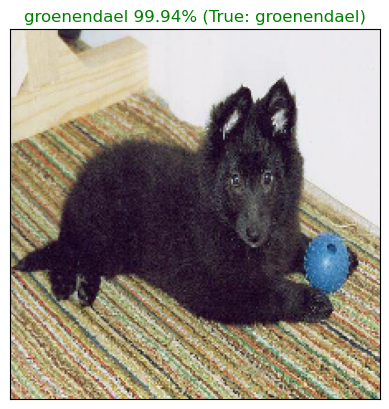

In [113]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [65]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    '''
    Plots the top 10 highest prediction confidences along
    with the truth label for sample n.
    '''
    pred_prob, true_label= prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color='grey')
    plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation='vertical')

    # Check if the true label is within the top 10 predictions
    if true_label in top_10_pred_labels:
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    else:
        pass

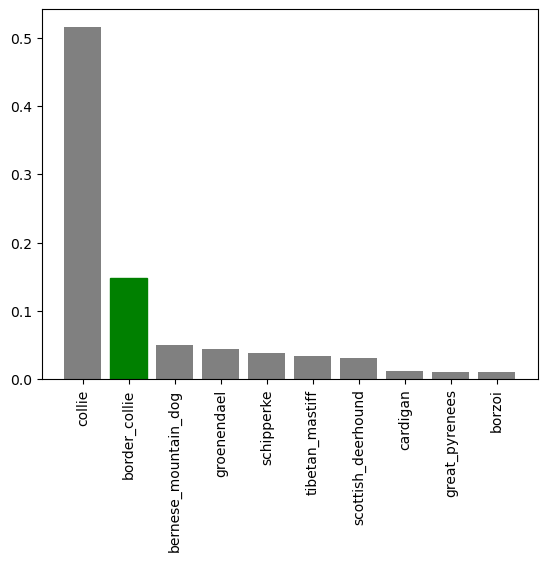

In [66]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

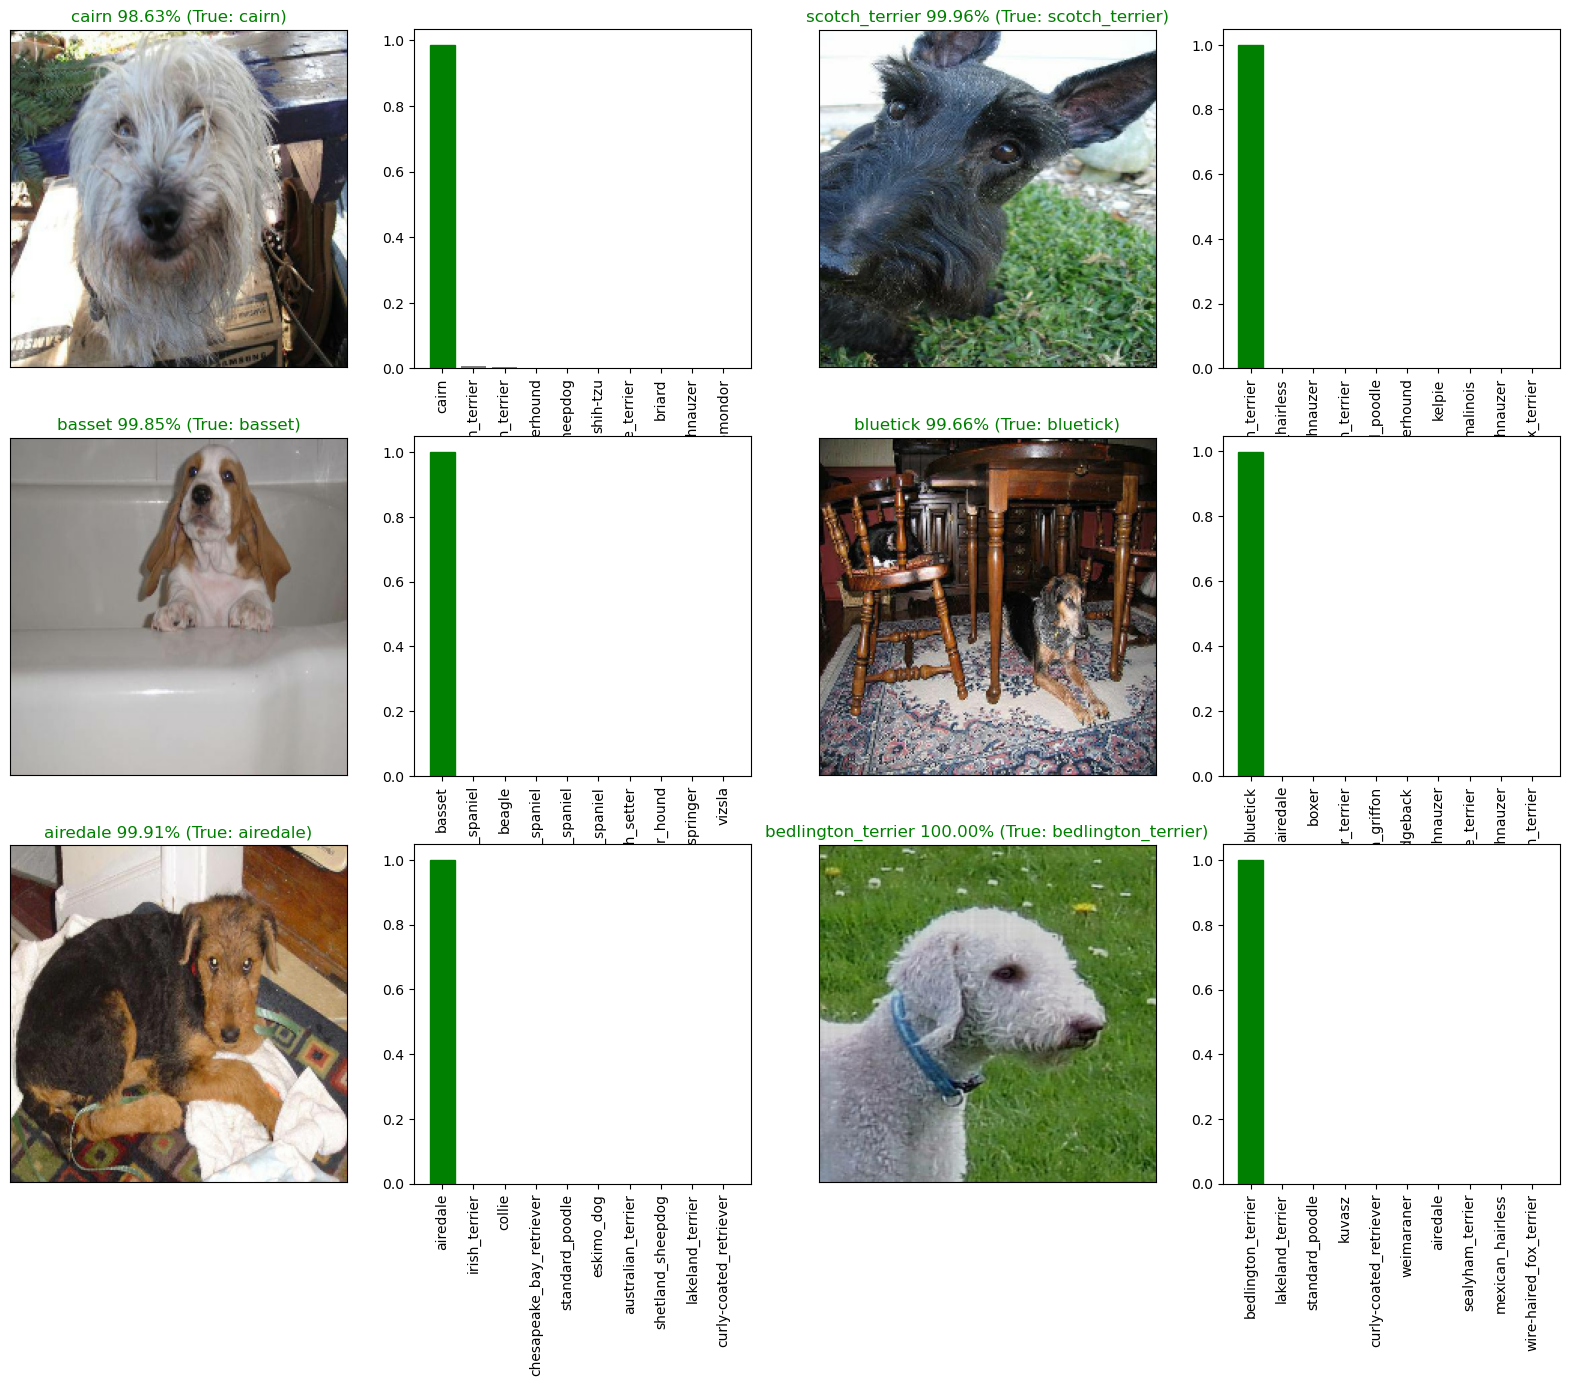

In [114]:
# Let's check out a few predictoins and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=i+i_multiplier)

## Saving and loading a model

In [68]:
# Create a function to save a model
import os
import datetime
def save_model(model, suffix=None):
    modeldir = os.path.join('ML_projects\Dog-vision\dog-breed-identification\Models',
                            datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_path = modeldir + '-' + suffix + '.h5'
    print(f'Saving model to: {model_path}...')
    model.save(model_path)
    return model_path

In [69]:
def load_model(model_path):
    print(f'Loading saved model from: {model_path}...')
    model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [ ]:
save_model(model, suffix='1000-images-mobilenetv2-Adam')

In [ ]:
model.evaluate(val_data)

## Training a model on Full Dataset

In [70]:
len(X), len(y)

(10222, 10222)

In [71]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [72]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [73]:
full_model = create_model()

In [74]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                            patience=3)

In [75]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/1000
320/320 [==============================] - 86s 258ms/step - loss: 1.5833 - accuracy: 0.6090
Epoch 2/1000
320/320 [==============================] - 79s 245ms/step - loss: 0.5680 - accuracy: 0.8377
Epoch 3/1000
320/320 [==============================] - 79s 246ms/step - loss: 0.3749 - accuracy: 0.8955
Epoch 4/1000
320/320 [==============================] - 80s 248ms/step - loss: 0.2552 - accuracy: 0.9386
Epoch 5/1000
320/320 [==============================] - 79s 247ms/step - loss: 0.1826 - accuracy: 0.9649
Epoch 6/1000
320/320 [==============================] - 79s 247ms/step - loss: 0.1338 - accuracy: 0.9803
Epoch 7/1000
320/320 [==============================] - 79s 246ms/step - loss: 0.1042 - accuracy: 0.9887
Epoch 8/1000
320/320 [==============================] - 80s 248ms/step - loss: 0.0789 - accuracy: 0.9933
Epoch 9/1000
320/320 [==============================] - 79s 248ms/step - loss: 0.0631 - accuracy: 0.9965
Epoch 10/1000
320/320 [==============================] 

In [81]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

Saving model to: ML_projects\Dog-vision\dog-breed-identification\Models\20240211-133632-full-image-set-mobilenetv2-Adam.h5...


'ML_projects\\Dog-vision\\dog-breed-identification\\Models\\20240211-133632-full-image-set-mobilenetv2-Adam.h5'

In [82]:
loaded_full_model =load_model('ML_projects\\Dog-vision\\dog-breed-identification\\Models\\20240211-133632-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: ML_projects\Dog-vision\dog-breed-identification\Models\20240211-133632-full-image-set-mobilenetv2-Adam.h5...


## Making predictions on the Test dataset

In [83]:
# load test image filenames
test_path = '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 '/Users/pwrxn/ML_projects/Dog-vision

In [84]:
len(test_filenames)

10357

In [85]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [86]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [87]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 87s 267ms/step


In [88]:
np.savetxt('preds_array.csv', test_predictions, delimiter=',')

In [89]:
test_predictions = np.loadtxt('preds_array.csv', delimiter=',')

In [90]:
test_predictions.shape

(10357, 120)

## Preparing test dataset for Kaggle

In [91]:
# Create a pandas dataframe
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))

In [92]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [93]:
# append test image id's to prediction dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [94]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,.ipynb_checkpoints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Add teh prediction probabilites to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

ValueError: Length of values (10357) does not match length of index (10358)

In [ ]:
preds_df.to_csv('/full_model_predictions_submission_1_mibilenetv2_Adam.csv',
                index=False)

## Making predicitons on custom images


In [ ]:
custom_path = '/Users/pwrxn/ML_projects/Dog-vision/dog-breed-identification/Custom-dogs/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom image into batch datasets
custom_data = create_data_batches(custom_image_paths[4:],test_data=True)
custom_data

In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

In [ ]:
# get custom images (our unbatchify() fucntion won't work since there aren't labels...
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

In [ ]:
for image, label in zip(custom_images, custom_preds_labels): 
    plt.figure()
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()
